In [190]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns
import re

## Analysis of ML results

In [275]:
results_path = '/home/robert/Documents/projects/ML_genetic_risk/results/pheno1/'

In [276]:
def load_pickle(file):
    return pickle.load(open(file, 'rb'))

### Overall Performance 

In [277]:
files = glob.glob(os.path.join(results_path, 'eval*'))

/home/robert/software/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


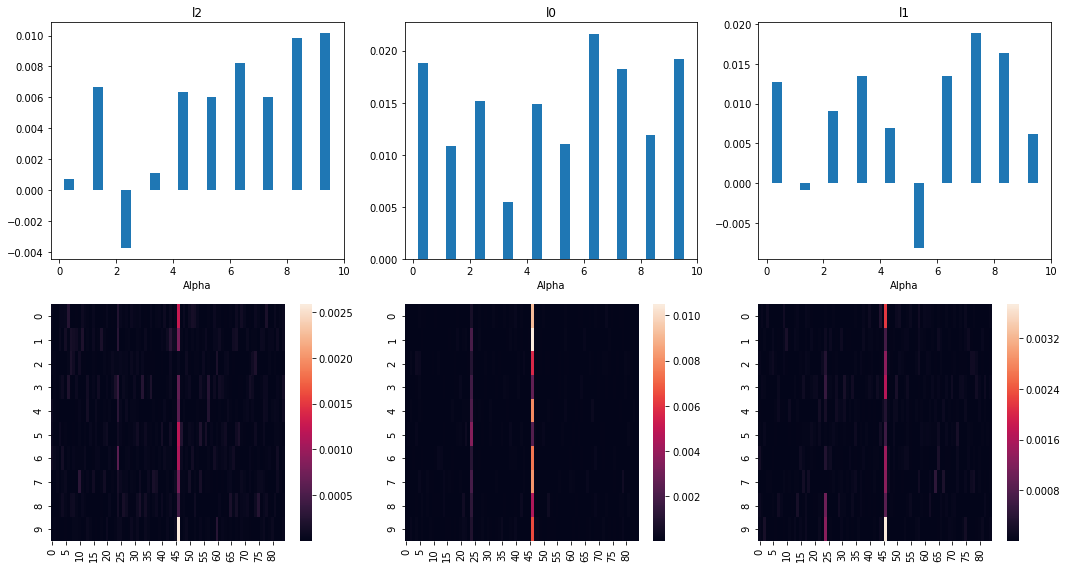

In [278]:
fig, ax = plt.subplots(2, len(files), figsize=(15, 8))
for i, f in enumerate(files):
    title = re.search('l[0-9]', f).group(0)
    dat = load_pickle(f)
    n_groups = len(dat['Overall'])
    index = np.arange(n_groups)
    bar_width = 0.35
    ax[0, i].bar(index + bar_width, dat['Overall'], bar_width)
    ax[0, i].set_title(title)
    ax[0, i].set_xlabel('Alpha')
    sns.heatmap(dat['Block'], ax=ax[1, i])

fig.tight_layout()
fig.show()
fig.savefig('/home/robert/Documents/projects/ML_genetic_risk/doc/presentation/sim_results/performance.png')

### Block SGD performance

In [279]:
file_models = glob.glob(os.path.join(results_path, 'model*'))
print(file_models)

['/home/robert/Documents/projects/ML_genetic_risk/results/pheno1/models_l2.pickle', '/home/robert/Documents/projects/ML_genetic_risk/results/pheno1/models_l0.pickle', '/home/robert/Documents/projects/ML_genetic_risk/results/pheno1/models_l1.pickle']


/home/robert/software/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


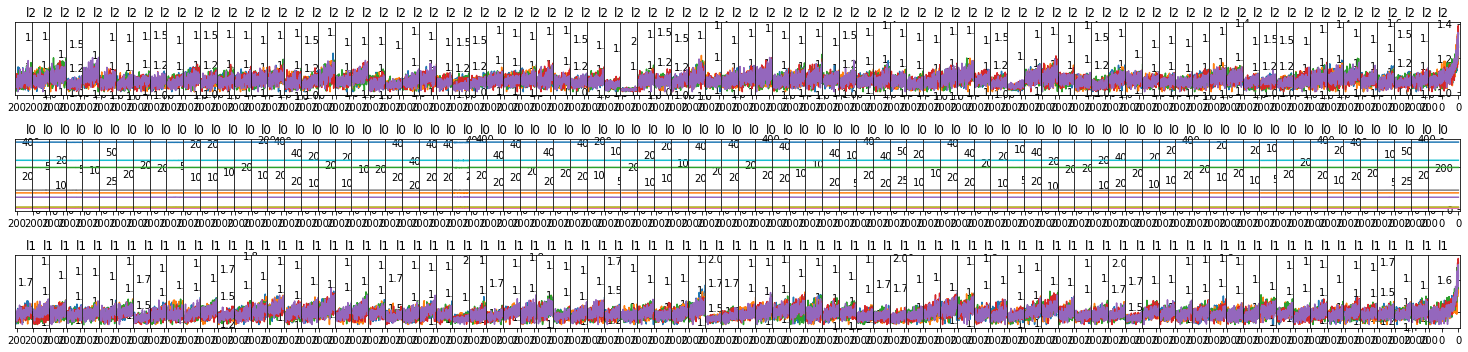

In [180]:
dat = load_pickle(file_models[0])
fig, ax = plt.subplots(len(file_models), len(dat), figsize=(20, 5))
for y, f in enumerate(file_models):
    dat = load_pickle(f)
    name = re.search('l[0-9]', f).group(0)
    for i, block in enumerate(dat):
        for u, alpha in enumerate(block['model']):
            ax[y, i].plot(range(alpha['param']['epoch']), alpha['param']['loss'], label=str(alpha['param']['lambda']))
            ax[y, i].set_title(name)
fig.tight_layout()
fig.show()

/home/robert/software/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


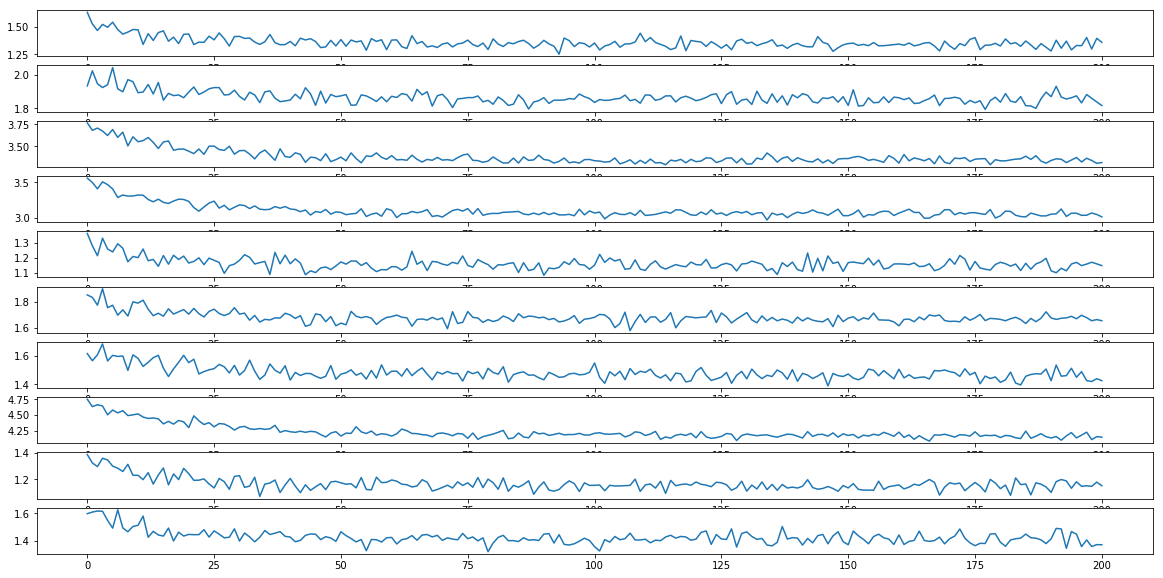

In [283]:
dat = load_pickle(file_models[2])
fig, ax = plt.subplots(10, 1, figsize=(20, 10))
ss = np.random.choice(range(len(dat)), 1)
for k, i in np.ndenumerate(ss):
    block = dat[i]
    for u, alpha in enumerate(block['model']):
        ax[u].plot(range(alpha['param']['epoch']), alpha['param']['loss'], label=str(alpha['param']['lambda']))
fig.show()

### Parameter Space

In [280]:
def paramter_details(dat):
    n_blocks = len(dat)

    block_info = []
    for i in range(n_blocks):
        block = dat[i]
        collection = {'parameter': [],
                      'zero_parameters': [],
                      'abs_sum_parameters': [],
                      'alphas': []}
        for alphas  in block['model']:
            param = alphas['coef'][0].flatten()
            collection['parameter'].append(len(param))
            collection['zero_parameters'].append(np.sum(~(param > 0)))
            collection['abs_sum_parameters'].append(np.sum(np.abs(param)))
            collection['alphas'].append(alphas['param']['lambda'])
        block_info.append(collection)
    return block_info

In [281]:
def proportion_matrix(block_info):
    n_blocks = len(block_info)
    n_alphas = len(block_info[0]['alphas'])
    prop_matrix = np.zeros((n_alphas, n_blocks))
    for index, bb in enumerate(block_info):
        ddd = pd.DataFrame.from_dict(bb, orient='index').T
        prop_matrix[:, index] = (ddd.zero_parameters / ddd.parameter).values
    return prop_matrix

/home/robert/software/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


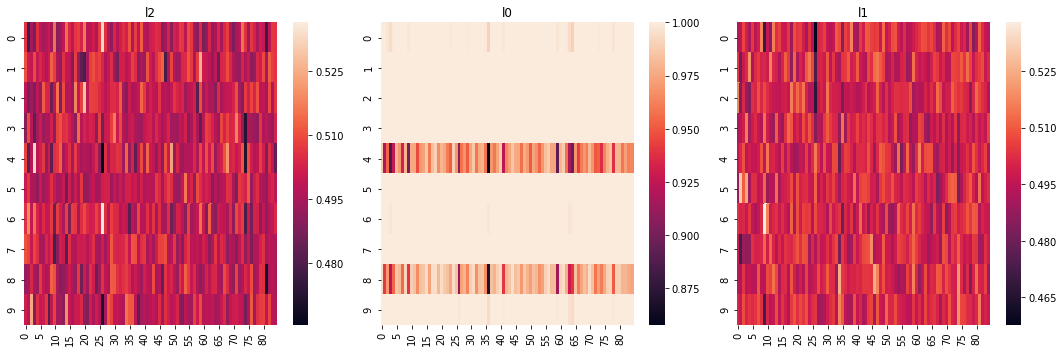

In [282]:
fig, ax = plt.subplots(1, len(file_models), figsize=(15, 5))
for i, f in enumerate(file_models):
    title = re.search('l[0-9]', f).group(0)
    dat = load_pickle(f)
    block_info = paramter_details(dat)
    prop_matrix = proportion_matrix(block_info)
    sns.heatmap(prop_matrix, ax=ax[i])
    ax[i].set_title(title)

fig.tight_layout()
fig.show()
fig.savefig('/home/robert/Documents/projects/ML_genetic_risk/doc/presentation/sim_results/null_proportion.png')